# Hospital Waiting Lists in Northern Ireland
## Cleaning datasets

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [97]:
import pandas as pd;import numpy as np;import matplotlib.pyplot as plt;import seaborn as sns;import plotly.express as px;import folium
import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
#import geopandas as gpd

## Input the GeoJSON & Co-ordinate Data

In [3]:
TBDirectory="https://www.opendatani.gov.uk/dataset/0b04b46c-49af-45d5-b277-91b10937a01b/resource/645f8eef-8813-47a9-bb1e-a4932ada721a/download/trustboundaries.geojson";print("All GeoJSON Imported")

All GeoJSON Imported


In [4]:
Coords = pd.read_csv(r"https://raw.githubusercontent.com/KPBreslin/FinalProject/master/coordinates.csv");TrustMPs=Coords.groupby('Trust').mean();print("All Coordinates Imported")

All Coordinates Imported


## Clean the Emergency and Diagnostics Dataset

In [70]:
EmergWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-ecwt-tables-q1-18-19.csv");EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)","The Royal", inplace=False);EmergWL=EmergWL.fillna(0);EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(" ","");EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(",","").astype(float);EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(" ","");EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(",","").astype(float);EmergWL["FiveToTwelve_sum"] = EmergWL["FiveToTwelve_sum"].str.replace(",","").astype(float) 
DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);
DiagnosticRTT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-reporting-turnaround-q2-19-20.csv");DiagnosticRTT=DiagnosticRTT.drop_duplicates();DiagnosticRTT.replace(".", 0, inplace=True);DiagnosticRTT=DiagnosticRTT.fillna(0);DiagnosticRTT=DiagnosticRTT.drop([9947]);DiagnosticRTT.drop(DiagnosticRTT.columns[DiagnosticRTT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticRTT["0-2 days"] = DiagnosticRTT["0-2 days"].str.replace(",","").astype(int);DiagnosticRTT["3-7 days"] = DiagnosticRTT["3-7 days"].str.replace(",","").astype(int);DiagnosticRTT["8-14 days"] = DiagnosticRTT["8-14 days"].str.replace(",","").astype(int);DiagnosticRTT["15-21 days"] = DiagnosticRTT["15-21 days"].str.replace(",","").astype(int);DiagnosticRTT["22-28 days"] = DiagnosticRTT["22-28 days"].str.replace(",","").astype(int);DiagnosticRTT[">28 days	"] = DiagnosticRTT[">28 days"].str.replace(",","").astype(int);DiagnosticRTT["Total"] = DiagnosticRTT["Total"].str.replace(",","").astype(int)
#DiagnosticRTT.drop(DiagnosticRTT.rows[DiagnosticRTT.rows.str.contains('the ending',case = False)],axis = 1, inplace = True)
print("All Emergency and Diagnostics Data Imported")

All Emergency and Diagnostics Data Imported


In [6]:
matplotlib inline

In [98]:
EmergWL.head()

,Year,MthAndYrCode,Trust,New_Hospital,Type,FourAndUnder_sum,FiveToTwelve_sum,OverTwelve_sum,Total_sum
0,2008/09,Apr-08,Belfast,Belfast City,Type 1,3391.0,473.0,1,3865.0
1,2008/09,Apr-08,Belfast,Mater,Type 1,3142.0,486.0,0,3628.0
2,2008/09,Apr-08,Belfast,The Royal,Type 1,5224.0,862.0,0,6086.0
3,2008/09,Apr-08,Belfast,RBHSC,Type 1,2480.0,398.0,0,2878.0
4,2008/09,Apr-08,Northern,Antrim Area,Type 1,4728.0,667.0,10,5405.0


Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5285412262156448
Test set Accuracy:  0.507399577167019


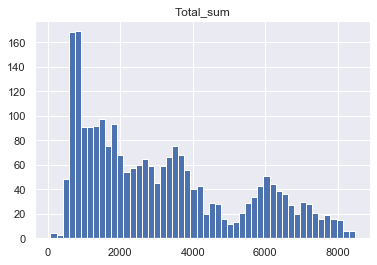

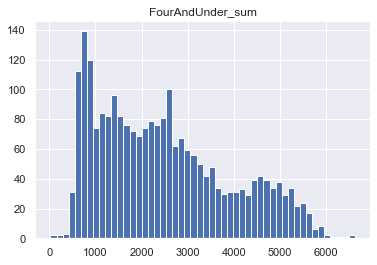

In [238]:

EmergWL['New_Hospital'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['New_Hospital'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [119]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.45031712, 0.45031712, 0.46723044, 0.49894292, 0.50105708,
       0.50951374, 0.52854123, 0.51374207, 0.53065539, 0.50951374,
       0.50105708, 0.49048626, 0.50105708, 0.51162791])

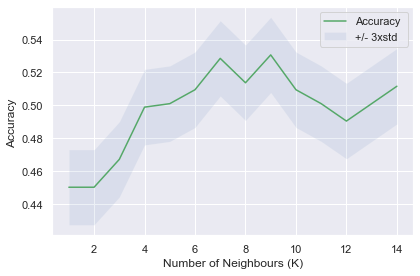

The best accuracy was with 0.5306553911205074 with k= 9


In [122]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5972515856236786
Test set Accuracy:  0.5983086680761099


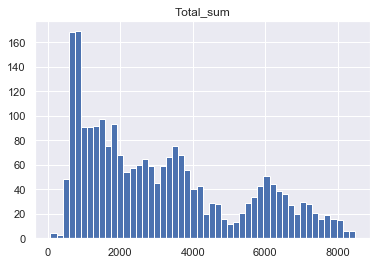

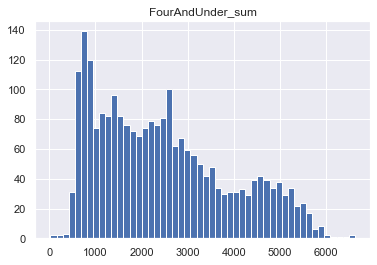

In [123]:

EmergWL['New_Hospital'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['Trust'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [124]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56659619, 0.54545455, 0.57716702, 0.59830867, 0.59830867,
       0.59408034, 0.61733615, 0.59196617, 0.60887949, 0.59830867,
       0.59830867, 0.60465116, 0.60887949, 0.60887949])

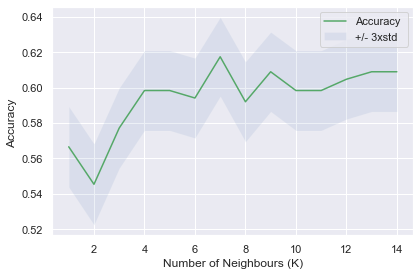

The best accuracy was with 0.6173361522198731 with k= 7


In [125]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Train set: (1892, 4) (1892,)
Test set: (473, 4) (473,)
Train set Accuracy:  0.5972515856236786
Test set Accuracy:  0.5983086680761099


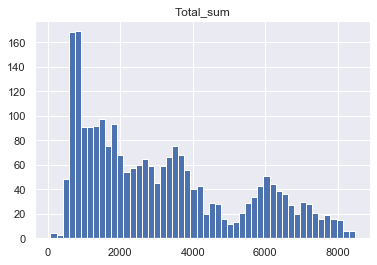

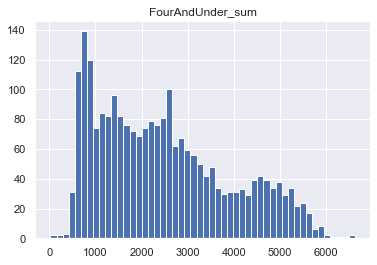

In [239]:

EmergWL['Trust'].value_counts()

EmergWL.hist(column='Total_sum', bins=50)
EmergWL.hist(column='FourAndUnder_sum', bins=50)
EmergWL.columns

X = EmergWL[['FourAndUnder_sum', 'FiveToTwelve_sum', 'OverTwelve_sum', 'Total_sum']] .values #.astype(float)
X[0:5]

y = EmergWL['Trust'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.neighbors import KNeighborsClassifier
k = 40
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))



In [240]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56659619, 0.54545455, 0.57716702, 0.59830867, 0.59830867,
       0.59408034, 0.61733615, 0.59196617, 0.60887949, 0.59830867,
       0.59830867, 0.60465116, 0.60887949, 0.60887949])

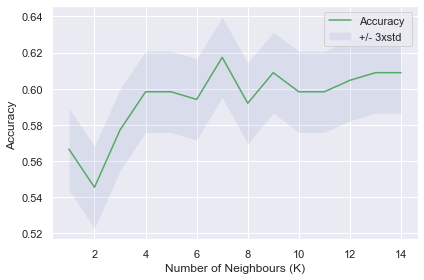

The best accuracy was with 0.6173361522198731 with k= 7


In [241]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [126]:

P=DiagnosticRTT.groupby('Month').mean()
P.plot.line()
Q=DiagnosticRTT.groupby('Category of test').mean()
Q.plot.barh()
DiagnosticWT.head()

,Quarter Ending,HSC Trust,Diagnostic Service,Recommended Waiting Time,Category,0 - 6 weeks,> 6 - 9 weeks,> 9 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,> 26 weeks,> 26 - 36 weeks,> 36 weeks,> 36 - 52 weeks,> 52 - 65 weeks,> 65 - 78 weeks,> 78 weeks,Total
7509,30-Sep-18,Belfast,Ambulatory BP,9 week,Physiological Measurement,139.0,28.0,3.0,29.0,37.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,242.0
7510,30-Sep-18,Belfast,Ambulatory ECG monitoring (24 hr holter),9 week,Physiological Measurement,327.0,79.0,82.0,44.0,8.0,320.0,13.0,307.0,9.0,40.0,188.0,70.0,860.0
7511,30-Sep-18,Belfast,Arthroscopy,13 week,Endoscopy,31.0,51.0,45.0,174.0,81.0,489.0,112.0,377.0,155.0,78.0,77.0,67.0,871.0
7512,30-Sep-18,Belfast,Barium Studies/Fluoroscopy,9 week,Imaging,125.0,4.0,0.0,6.0,0.0,6.0,2.0,4.0,1.0,1.0,2.0,0.0,141.0
7513,30-Sep-18,Belfast,Bronchial challenge testing,9 week,Physiological Measurement,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0


In [167]:
DiagnosticWT.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 7509 to 8578
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Quarter Ending            1070 non-null   object 
 1   HSC Trust                 1070 non-null   object 
 2   Diagnostic Service        1070 non-null   object 
 3   Recommended Waiting Time  1070 non-null   object 
 4   Category                  1070 non-null   object 
 5   0 - 6 weeks               1070 non-null   float64
 6   > 6 - 9 weeks             1070 non-null   float64
 7   > 9 - 13 weeks            1070 non-null   float64
 8   > 13 - 21 weeks           1070 non-null   float64
 9   > 21 - 26 weeks           1070 non-null   float64
 10  > 26 weeks                1070 non-null   float64
 11  > 26 - 36 weeks           1070 non-null   float64
 12  > 36 weeks                1070 non-null   float64
 13  > 36 - 52 weeks           1070 non-null   float64
 14  > 52 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024FE61DAB08>]],
      dtype=object)

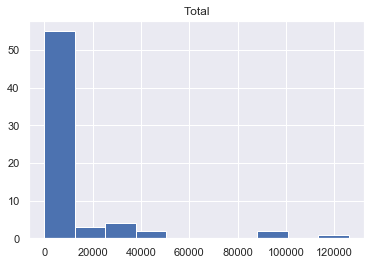

In [166]:
A=DiagnosticWT.groupby('Diagnostic Service').sum()
B=DiagnosticWT.groupby('Category').sum()
C=DiagnosticWT.groupby('Recommended Waiting Time').sum()
C
#x=A["0-6 weeks"]
#y=A["Total"]
A.hist(column='Total', bins=10)
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.show()
#.hist(column='0 - 6 weeks', bins=150)
#EmergWL.hist(column='FourAndUnder_sum', bins=50)
#A.plot.bar()

In [169]:
DiagnosticWT.column()

AttributeError: 'DataFrame' object has no attribute 'column'

In [246]:
DiagnosticWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-diagnostic-waiting-times-q2-19-20.csv");DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);

df=DiagnosticWT
df['Below 9 weeks'] = df["> 6 - 9 weeks"] + df["0 - 6 weeks"]
df['% Below 9 weeks'] = 100*df['Below 9 weeks'].divide(df["Total"], fill_value=1)
df['Below 13 weeks'] = df["> 9 - 13 weeks"] + df['Below 9 weeks']
df['% Below 13 weeks']= 100*df['Below 13 weeks'].divide(df["Total"], fill_value=1) 
df=df.drop(df.columns[[5,6,7,8,9,10,11,12]], axis = 1, inplace = False) 
df2=df.dropna(axis='columns')
df2['Below Recommended'] = np.where(df2["Recommended Waiting Time"] == "9 week", df['% Below 9 weeks'],df['% Below 13 weeks'])
df2



# Visualize pairplot of df

#df2.head()
#df.info()
#df.list()
#plt.figure(figsize=(8,5))
#x_data, y_data = (df2['% Below 9 weeks'].values, HSCT31DCWT['% Below 13 weeks'].values)
#plt.plot(x_data, y_data,'ro')
#plt.ylabel('62 days')
#plt.xlabel('31 days')
#plt.show()

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Quarter Ending,HSC Trust,Diagnostic Service,Recommended Waiting Time,Category,Total,Below 9 weeks,% Below 9 weeks,Below 13 weeks,% Below 13 weeks,Below Recommended
0,31-Mar-08,Belfast,Barium Studies,9 week,Imaging,316.0,256.0,81.012658,316.0,100.000000,81.012658
1,31-Mar-08,Belfast,Colonoscopy,13 week,Endoscopy,667.0,269.0,40.329835,539.0,80.809595,80.809595
2,31-Mar-08,Belfast,Computerised Tomography,9 week,Imaging,1253.0,907.0,72.386273,1253.0,100.000000,72.386273
3,31-Mar-08,Belfast,Cystoscopy,13 week,Endoscopy,789.0,371.0,47.021546,629.0,79.721166,79.721166
4,31-Mar-08,Belfast,DEXA Scan,9 week,Imaging,606.0,281.0,46.369637,606.0,100.000000,46.369637
...,...,...,...,...,...,...,...,...,...,...,...
8574,30-Sep-19,Western,Spirometry inc.flow volume curves,9 week,Physiological Measurement,94.0,86.0,91.489362,94.0,100.000000,91.489362
8575,30-Sep-19,Western,Static lung volumes,9 week,Physiological Measurement,79.0,71.0,89.873418,79.0,100.000000,89.873418
8576,30-Sep-19,Western,Tilt testing and autonomic function,9 week,Physiological Measurement,18.0,10.0,55.555556,14.0,77.777778,55.555556
8577,30-Sep-19,Western,Transfer Factor,9 week,Physiological Measurement,92.0,84.0,91.304348,92.0,100.000000,91.304348


In [259]:
df3=df2
df3['Quarter Ending']=pd.to_datetime(df3['Quarter Ending'])
#df3.to_datetime('13000101', format='%d%m%Y', errors='ignore')
#pd.to_datetime('2010/11/12', format='%Y/%m/%d')

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: 'AxesSubplot' object is not callable

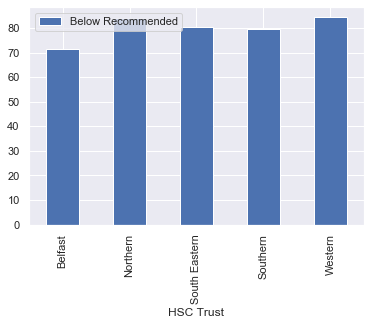

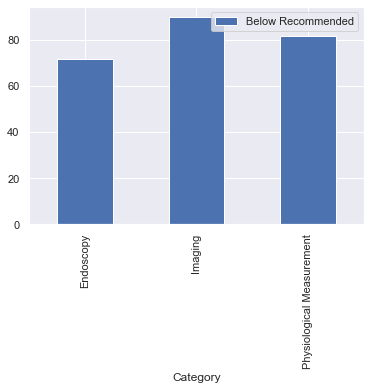

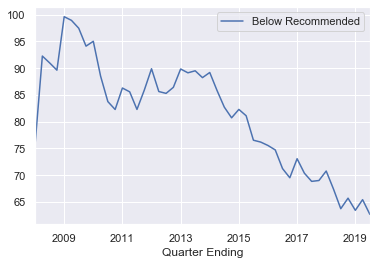

In [265]:
df2
V=df2.groupby("HSC Trust").mean()
V.plot.bar(y='Below Recommended')

#df2
W=df2.groupby("Category").mean()
W.plot.bar(y='Below Recommended')


W=df3.groupby("Quarter Ending").mean()
W.plot.line(y='Below Recommended')(subplots=True)
#P=df2.groupby(['Recommended Waiting Time','Diagnostic Service']).size().reset_index().groupby('Diagnostic Service')[[0]].max()
#P
#sns.pairplot(P, hue='rating')

In [209]:
df.drop(df.columns[[6,7,8]], axis = 1, inplace = True) 

AttributeError: 'NoneType' object has no attribute 'info'

In [263]:

DiagnosticRTT['Month']=pd.to_datetime(DiagnosticRTT['Month'])
DiagnosticRTT.head()

,Month,HSC Trust,Category of test,Test,Priority,0-2 days,3-7 days,8-14 days,15-21 days,22-28 days,>28 days,Total,% reported within 2 days,% reported within 2 weeks,% reported within 4 weeks,>28 days\t
0,2010-10-31,Belfast,IMAGING,BARIUM ENEMA,ROUTINE,88,9,4,1,15,5,122,0.0,82.8,95.9,5
1,2010-10-31,Belfast,IMAGING,BARIUM ENEMA,URGENT,9,3,0,0,0,0,12,75.0,0.0,0.0,0
2,2010-10-31,Belfast,IMAGING,COMPUTERISED TOMOGRAPHY,ROUTINE,1521,218,83,7,127,31,1987,0.0,91.7,98.4,31
3,2010-10-31,Belfast,IMAGING,COMPUTERISED TOMOGRAPHY,URGENT,279,43,18,2,10,4,356,78.4,0.0,0.0,4
4,2010-10-31,Belfast,IMAGING,DEXA SCAN,ROUTINE,0,0,1,2,1,6,10,0.0,10.0,40.0,6


C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



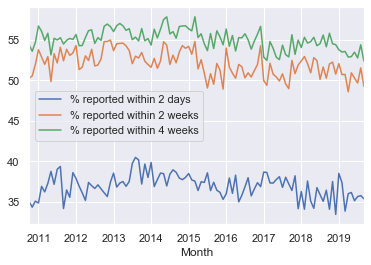

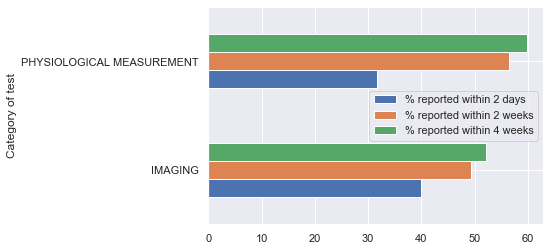

In [277]:
#df3['Quarter Ending']=pd.to_datetime(df3['Quarter Ending'])
P=DiagnosticRTT.groupby('Month')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
P.plot.line()
Q=DiagnosticRTT.groupby('Category of test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
Q.plot.barh()

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\Pat\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



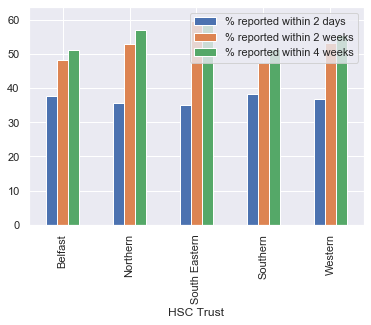

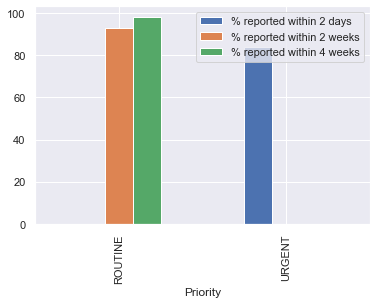

In [276]:
#DiagnosticRTT.head()

#R=DiagnosticRTT.groupby('Test')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
#R.plot.barh()
#R.plot.kde()
S=DiagnosticRTT.groupby('HSC Trust')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
S.plot.bar()
T=DiagnosticRTT.groupby('Priority')["% reported within 2 days","% reported within 2 weeks","% reported within 4 weeks"].mean()
T.plot.bar()



In [12]:

X=EmergWL.groupby('New_Hospital')



#.describe()
#EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)",
#                          "The Royal", 
#                          inplace=True)
#EmergWL.describe()

## Clean the Inpatient and Outpatient lists

In [75]:
FirstCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-q2-19-20.csv")
#Remove footer data
FirstCOPWL=FirstCOPWL.drop([6134,6135,6136,6137,6138])
FirstCOPWL.replace("--", 0, inplace=True)
#FirstCOPWL["0 - 6 weeks"] = pd.to_numeric(FirstCOPWL["0 - 6 weeks"])


CentralCOPWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-outpatients-centralisation-q2-19-20.csv")
#Remove footer data
CentralCOPWL=CentralCOPWL.drop([66,67,68,69,70,71]),CentralCOPWL=CentralCOPWL.dropna(axis='columns')
OrigCCOPWL=CentralCOPWL
CentralCOPWL.replace("--", 0, inplace=True)


CentralCOPWL["Total Waiting "] = CentralCOPWL["Total Waiting "].str.replace(",","").astype(float)
#CentralCOPWL[" > 18 weeks "] = CentralCOPWL[" > 18 weeks "].astype(float)
CentralCOPWL['Below 18 weeks']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)
#CentralCOPWL['Below 18 weeksB']= CentralCOPWL.iloc[:, 4:9].sum(axis=1)

CentralCOPWL.drop(CentralCOPWL.columns[[4,5,6,7,8,9,10,11]], axis = 1, inplace = True) 
#CentralCOPWL['Above 18 weeks']= CentralCOPWL.iloc[:,-2:-1].subtract(axis=1)
#CentralCOPWL.drop(columns =["Treatment Month"], inplace = True) 
CentralCOPWL['Above 18 weeks'] = CentralCOPWL['Total Waiting '].sub(CentralCOPWL['Below 18 weeks'], axis = 0) 

ICATSWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-icats-q2-19-20.csv")
ICATSWLA=ICATSWL.drop_duplicates();ICATSWL=ICATSWLA.drop([689,691,692,693,694]);ICATSWL=ICATSWL.dropna(axis='columns');ICATSWL=ICATSWL.fillna(0)
ICATSWL.replace("--", 0, inplace=True)
#Remove footer data

DayCaseIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-day-cases-q2-19-20.csv")
#Remove footer data
DayCaseIPWL=DayCaseIPWL.drop([4399,4400,4401,4402,4403,4404,4405,4406,4407,4408,4409,4410,4411,4412]);DayCaseIPWL.drop(DayCaseIPWL.columns[DayCaseIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DayCaseIPWL.replace("--", 0, inplace=True);DayCaseIPWL.fillna(0)
#TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


AdminIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-inpatients-q2-19-20.csv")
#Remove footer data
AdminIPWL=AdminIPWL.drop([2994,2995,2996,2997,2998,2999,3000,3001,3002,3003,3004,3005]);AdminIPWL=AdminIPWL.dropna(axis='columns');AdminIPWL=AdminIPWL.fillna(0);AdminIPWL.drop(AdminIPWL.columns[AdminIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

AdminIPWL["0 - 6 weeks"] = AdminIPWL["Total"].str.replace(",","").astype(int);AdminIPWL["> 6 - 13 weeks"] = AdminIPWL["> 6 - 13 weeks"].str.replace(",","").astype(int);AdminIPWL["> 13 - 21 weeks"] = AdminIPWL["> 13 - 21 weeks"].str.replace(",","").astype(int);AdminIPWL["> 21 - 26 weeks"] = AdminIPWL["> 21 - 26 weeks"].str.replace(",","").astype(int);AdminIPWL["Total"] = AdminIPWL["Total"].str.replace(",","").astype(int)

TotalIPWL=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-tables-total-waiting-q2-19-20.csv");TotalIPWL=TotalIPWL.drop([4550,4551,4552,4553,4554,4555,4556,4557,4558,4559,4560,4561]);TotalIPWL=TotalIPWL.fillna(0);TotalIPWL.drop(TotalIPWL.columns[TotalIPWL.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);TotalIPWL["Total"] = TotalIPWL["Total"].str.replace(",","").astype(int)
print("All In and Out Patient Data Imported")

All In and Out Patient Data Imported


## Clean the Cancer Waiting Lists

In [12]:
HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT31DCWT["Treatment_Month"]= new[0] ;HSCT31DCWT["Treatment Year"]= '20' + new[1]
HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]


HSCT62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-trust-q1-19-20.csv")
#remove NA columns
HSCT62DCWT=HSCT62DCWT.dropna(axis='columns')
new=HSCT62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
HSCT62DCWT["Treatment_Month"]= new[0] 
HSCT62DCWT["Treatment Year"]= '20' + new[1]
HSCT62DCWT.drop(columns =["Treatment Month"], inplace = True) 
HSCT62DCWT = HSCT62DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 62 days']]


TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]

TS62DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-62-day-wait-by-tumour-q1-19-20.csv")
TS62DCWT.drop(TS62DCWT.columns[TS62DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS62DCWT.replace("--", 
           0, 
           inplace=True)
TS62DCWT.replace("-", 
           0, 
           inplace=True)
new=TS62DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS62DCWT["Treatment_Month"]= new[0] 
TS62DCWT["Treatment Year"]= '20' + new[1]
TS62DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS62DCWT= TS62DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 62 days']]
#TS62DCWT=TS62DCWT.dropna(axis='columns')


CWT14D=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-14-day-wait-q1-19-20.csv")
CWT14D=CWT14D.dropna(axis='columns')
new2=CWT14D["Month Seen"].str.split("-", n = 1, expand = True) 
CWT14D["Month_Seen"]= new[0] 
CWT14D["Year Seen"]= '20' + new[1]
CWT14D.drop(columns =["Month Seen"], inplace = True) 
CWT14D = CWT14D[['Month_Seen', 'Year Seen', 'HSC Trust', '% seen within 14 days']]


print("All Cancer Data Imported")

All Cancer Data Imported


,Month_Seen,Year Seen,HSC Trust,% seen within 14 days
0,Dec,2008,Belfast,100.0
1,Dec,2008,Northern,100.0
2,Dec,2008,South Eastern,100.0
3,Dec,2008,Southern,100.0
4,Dec,2008,Western,100.0


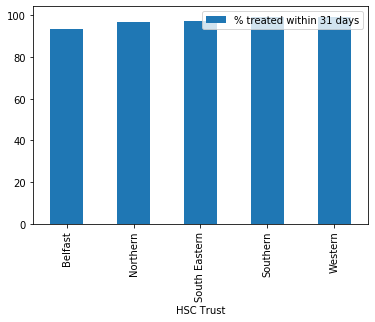

In [89]:
HSCT31DCWT.head()
test=HSCT31DCWT.groupby(["HSC Trust"]).mean()
test.plot.bar()

CWT14D.head()
#TwentySixtoMax = DayCaseIPWL['> 26-30 weeks'] + DayCaseIPWL['>26-52 weeks'] + DayCaseIPWL['>30-36 weeks'] + DayCaseIPWL['> 26 - 36 weeks']
#Max=DayCaseIPWL['> 26 weeks'] + DayCaseIPWL['>52 weeks'] + DayCaseIPWL['> 36 weeks'] 


#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,'> 26 weeks'].add(DayCaseIPWL.loc[:,'> 36 weeks'])
#DayCaseIPWL['Max'] = DayCaseIPWL.loc[:,['> 26 weeks','> 36 weeks','>52 weeks']].sum(axis=1)
#DayCaseIPWL['Max']  = DayCaseIPWL.apply(lambda x: x['> 26 weeks'] +x['> 36 weeks'], axis=1)
#DayCaseIPWL.describe()
#df.loc[:,'> 26-30 weeks'] = df.loc[:,'> 26-30 weeks'] = df.loc[:,'budget'].add(df.loc[:,'actual'])
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#DayCaseIPWL=DayCaseIPWL.dropna(axis='columns')
#new3=DayCaseIPWL["Quarter Ending"].str.split("-", n = 1, expand = True) 
#DayCaseIPWL["QE Day"]= new2[0] 
#DayCaseIPWL["QE Month"]= new2[1]
#DayCaseIPWL["QE Year"]= new2[2]
#DayCaseIPWL.drop(columns =["Quarter Ending"], inplace = True) 
#DayCaseIPWL = DayCaseIPWL[['QE Month','QE Year', 'HSC Trust','Specialty','Programme of Care','0 - 6 weeks','6 - 13 weeks','> 13 - 21 weeks','> 21 - 26 weeks','Total']]


In [9]:
new2=TS62DCWT[['Tumour Site', '% treated within 62 days']]
new2[pd.to_numeric(new2['% treated within 62 days'], errors='coerce').notnull()]
new2
C=new2.groupby(['Tumour Site'])



NameError: name 'TS62DCWT' is not defined

## Graphical Experiments

In [13]:
TS31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-tumour-q1-19-20.csv")  
TS31DCWT.drop(TS31DCWT.columns[TS31DCWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
TS31DCWT.replace("--", 
           0, 
           inplace=True)
TS31DCWT.replace("-", 
           0.0, 
           inplace=True)
#TS31DCWT=TS31DCWT.dropna(axis='columns')
new=TS31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
TS31DCWT["Treatment_Month"]= new[0] 
TS31DCWT["Treatment Year"]= '20' + new[1]
TS31DCWT.drop(columns =["Treatment Month"], inplace = True) 
TS31DCWT= TS31DCWT[['Treatment_Month', 'Treatment Year', 'Tumour Site', '% treated within 31 days']]
#A=TS31DCWT.groupby(['% treated within 31 days'])
#A.describe()
A=TS31DCWT.groupby(['Treatment Year'])
A


Graphs of the Cancer waiting times by Trust


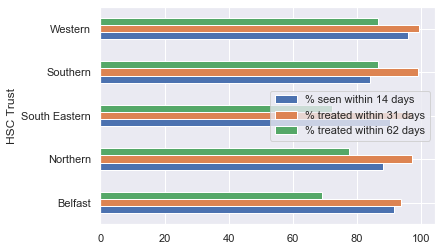

In [14]:
#CANCER WAITING TIMES
A=HSCT31DCWT.groupby(['HSC Trust']).mean()
B=HSCT62DCWT.groupby(['HSC Trust']).mean()
C=CWT14D.groupby(['HSC Trust']).mean()
#A.plot.bar()
#B.plot.bar()
join = pd.concat([C,A,B], axis=1, join='inner')
join.plot.barh()
print("Graphs of the Cancer waiting times by Trust")

Graphs of the Cancer waiting times by Treatment Time


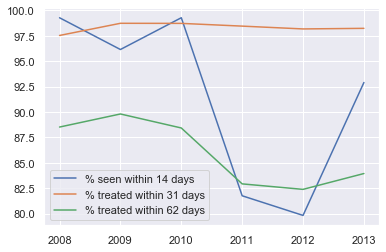

In [45]:
#CANCER WAITING TIMES
#df.month = pd.to_datetime(df.month, unit='s')
#['Treatment Month']
A=HSCT31DCWT.groupby(['Treatment Year']).mean()
B=HSCT62DCWT.groupby(['Treatment Year']).mean()
C=CWT14D.groupby(['Year Seen']).mean()
D = pd.concat([C,A,B], axis=1, join='inner')
D.plot.line()
print("Graphs of the Cancer waiting times by Treatment Time")



#plt.zlabel('14 days')

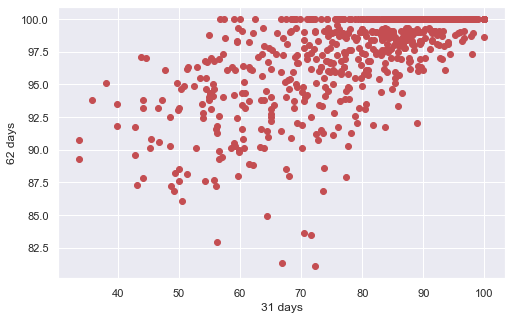

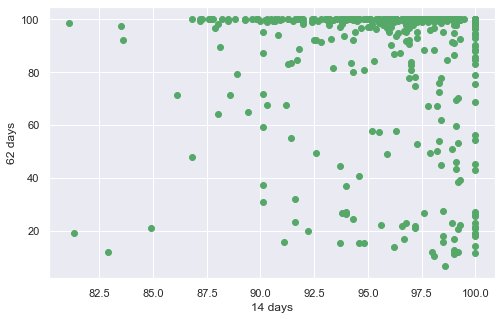

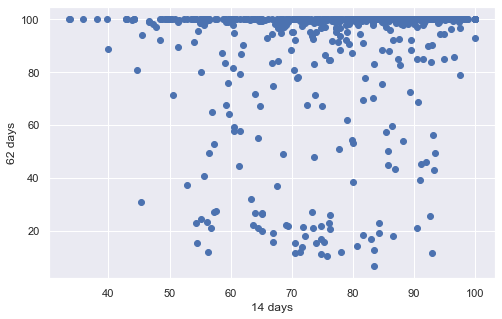

In [21]:

plt.figure(figsize=(8,5))
x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, HSCT31DCWT["% treated within 31 days"].values)
plt.plot(x_data, y_data,'ro')
plt.ylabel('62 days')
plt.xlabel('31 days')
plt.show()


plt.figure(figsize=(8,5))
x_data, y_data = (HSCT31DCWT["% treated within 31 days"].values, CWT14D['% seen within 14 days'].values)
plt.plot(x_data, y_data, 'go')
plt.ylabel('62 days')
plt.xlabel('14 days')
plt.show()


plt.figure(figsize=(8,5))
x_data, y_data = (HSCT62DCWT["% treated within 62 days"].values, CWT14D['% seen within 14 days'].values)
plt.plot(x_data, y_data, 'bo')
plt.ylabel('62 days')
plt.xlabel('14 days')
plt.show()

sns.regplot(x='x_data', y='y_data', data=df)

In [48]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=b772ca83d2012860bf0ba9e01ba64419ca6c20cf698531e0f55c3a276ba88478
  Stored in directory: c:\users\pat\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [57]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
X=HSCT62DCWT["% treated within 62 days"]
Y=CWT14D['% seen within 14 days"]
lm.fit(X,Y)

SyntaxError: EOL while scanning string literal (<ipython-input-63-b0d1a9c89200>, line 2)

In [55]:
x_data, y_data = (np.asarrayHSCT62DCWT["% treated within 62 days"].values, HSCT31DCWT["% treated within 31 days"].values)
X=x_data
y=y_data
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

ValueError: Expected 2D array, got 1D array instead:
array=[ 81.8  83.8  85.2  94.3  78.1  85.9  83.7  91.9  98.   77.3  89.5  89.3
  97.4 100.   86.1  84.8  95.7  91.4  93.   76.5  80.5  90.   79.1  93.
  66.7  83.   88.4  83.3  97.1  83.3  83.8  87.6  97.6  97.8  81.1  89.1
  93.1  93.3 100.   85.   90.3  91.7  88.5  96.6 100.   75.4  80.6  92.5
 100.   94.8  75.5  86.6  87.  100.   87.5  85.7  94.7  96.1  98.3  94.9
  83.3  87.8  92.1 100.   93.4  77.6  86.   90.1 100.   97.5  84.3  86.9
  89.4  93.2  97.5  84.1  71.4  97.4  97.1  91.4  84.7  95.1  86.3  96.8
  93.1  80.6  74.3  87.8  86.6  92.8  90.   83.1  88.2 100.   95.   76.4
  87.3  92.6  95.5  96.8  86.4  88.2  92.5 100.   88.5  84.1  86.7  91.4
  95.7  95.   80.3  86.3  98.1  95.7  94.3  82.7  95.3  98.1 100.   96.6
  80.   90.6  93.4  96.   90.5  72.5  85.3  96.9  97.9  89.2  85.4  86.9
  84.8  90.   86.9  86.5  91.7  95.  100.   90.5  78.8  78.   81.4  83.7
  92.9  77.9  84.7  91.3  92.4  93.2  80.9  84.6  87.5  98.2  84.7  75.3
  87.1  84.   89.6  88.1  65.   88.2  91.5  95.6  81.1  80.5  86.8  91.4
  93.7  75.   64.6  83.6  85.7  83.7  81.5  76.5  77.   85.6  85.4  89.7
  74.   83.3  94.1  71.   93.5  77.2  78.2  87.7  81.8  76.8  76.6  85.1
  84.1  94.   80.   69.   84.   88.2  77.6  82.3  78.1  96.   93.6  77.
  72.1  77.1  87.6  87.9  87.4  76.8  70.1  86.6  87.1  88.3  80.2  77.1
  83.7  90.2  94.   80.9  74.7  84.5  94.3  92.6  78.7  72.7  87.8  87.6
  87.5  80.   60.9  71.4  82.2  91.8  66.1  77.3  75.5  96.6  92.3  91.4
  73.2  74.5  88.5  87.7  81.5  75.3  75.7  89.3  93.9  73.8  75.2  80.8
  91.1  87.9  81.7  77.6  70.4  87.6  78.9  89.   69.1  81.2  79.7  89.7
  90.8  66.7  80.9  87.4  88.9  88.2  73.9  80.2  87.2  83.3  84.1  71.6
  87.1  80.   89.2  90.7  83.3  88.1  89.8  85.4  92.2  80.9  81.1  83.5
  89.4  88.   73.2  74.2  87.   89.   82.1  83.1  79.7  94.   89.4  95.5
  79.1  70.9  79.5  93.8  88.9  81.2  83.3  80.   96.   93.8  77.   80.
  89.5  81.6  92.3  80.6  77.7  85.9  91.4  95.2  79.4  82.3  81.1  89.5
  88.2  79.8  75.5  77.2  91.9  91.8  74.4  83.8  65.9  85.7  86.3  77.9
  86.7  86.5  92.6  88.9  86.1  79.8  64.8  83.5  89.5  72.9  81.6  67.
  88.2  90.4  77.2  84.8  67.6  84.3  86.8  79.3  76.1  74.8  73.9  94.
  68.2  82.9  71.3  85.4  89.6  67.8  74.8  71.6  74.7  90.   73.7  73.3
  73.4  79.   94.2  67.3  63.6  70.5  76.2  98.7  65.1  54.9  79.8  86.4
  90.   46.7  63.6  58.7  83.3  86.7  64.3  57.4  61.5  88.9  90.8  68.8
  74.1  55.6  85.1  93.   73.6  68.3  55.6  90.9  94.   61.5  68.4  55.1
  91.   93.9  64.5  62.5  56.5  88.9  93.7  63.9  67.5  60.3  96.4  87.7
  70.5  81.   60.5  91.1  94.9  65.1  72.3  60.4  91.8  88.2  57.3  72.7
  61.7  84.2  88.1  65.1  75.9  62.   87.4  87.2  56.5  60.   57.3  82.2
  89.3  55.2  62.1  61.4  95.2  89.   46.6  69.9  56.7  76.5  90.3  63.4
  75.2  54.3  87.3  94.9  55.1  75.7  71.   91.2  87.2  52.8  61.5  59.2
  85.9  91.8  55.7  80.5  53.9  89.6  98.9  59.2  68.2  59.5  90.4  90.4
  57.   70.5  45.3  90.6  83.9  63.9  64.6  54.5  83.5  93.7  59.7  77.3
  57.6  83.4  89.4  58.5  71.7  71.   80.6  82.7  59.   72.2  47.7  78.
  87.2  59.9  70.7  35.8  82.   77.9  59.5  69.4  33.6  87.8  86.5  65.1
  71.6  38.1  83.3  84.6  63.4  68.8  43.8  90.9  82.4  56.2  67.6  44.6
  85.7  93.8  59.   79.   54.6  80.   92.   56.5  76.2  55.3  81.7  89.3
  56.2  72.5  50.4  84.3  94.3  62.1  70.2  53.8  76.2  84.4  63.2  77.8
  55.7  69.1  89.6  54.   68.3  51.5  67.   84.4  51.4  67.7  50.9  71.9
  88.3  50.5  69.4  42.9  72.2  87.5  65.6  74.4  48.5  69.3  88.7  56.5
  73.8  44.1  74.8  91.7  55.8  73.6  55.   75.   89.2  56.   73.3  55.2
  68.   91.2  59.9  69.5  53.5  77.7  87.3  68.   87.1  62.9  86.2  84.7
  60.3  72.4  57.8  69.4  90.8  54.3  76.   60.8  74.2  81.8  65.   70.3
  60.4  78.8  84.8  48.5  60.6  54.4  79.3  83.7  60.5  66.9  52.4  74.2
  84.1  48.7  56.3  49.7  81.5  85.3  49.8  60.6  47.3  68.8  75.8  44.2
  64.   45.5  75.8  74.4  49.4  70.1  51.4  72.3  68.5  49.2  73.   39.9
  71.4  71.7  50.   73.5  52.9  70.4  69.2  50.   68.6  55.   76.8  66.7
  50.   65.2  42.8  82.1  59.5  33.7  64.4  39.8  59.1  59.6  43.1  56.1
  44.1  74.4  63.7].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

 beta_1 = 2.065918, beta_2 = -0.283398


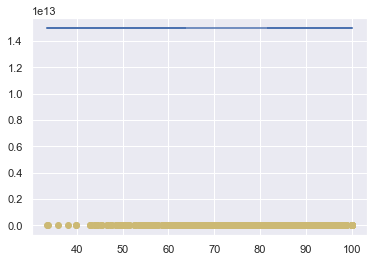

In [44]:
beta_1 = 2.065918
beta_2 = -0.283398

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'yo')

xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

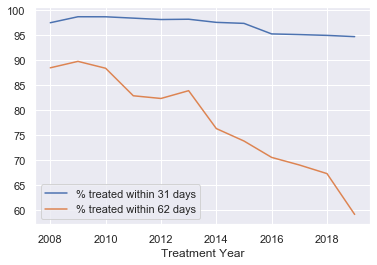

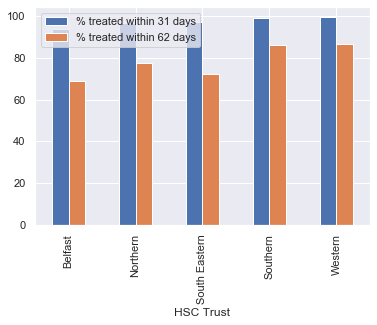

In [16]:
#HSCT31DCWT=pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-cwt-31-day-wait-by-trust-q1-19-20.csv")
#HSCT31DCWT=HSCT31DCWT.dropna(axis='columns')
#new=HSCT31DCWT["Treatment Month"].str.split("-", n = 1, expand = True) 
#HSCT31DCWT["Treatment_Month"]= new[0] 
#HSCT31DCWT["Treatment Year"]= '20' + new[1]
#HSCT31DCWT.drop(columns =["Treatment Month"], inplace = True) 
#HSCT31DCWT = HSCT31DCWT[['Treatment_Month', 'Treatment Year', 'HSC Trust', '% treated within 31 days']]

E=HSCT31DCWT.groupby(['Treatment Year']).mean()
#E.plot.line()
F=HSCT31DCWT.groupby(['HSC Trust']).mean()
#F.plot.bar()
G=HSCT62DCWT.groupby(['Treatment Year']).mean()
#G.plot.line()
H=HSCT62DCWT.groupby(['HSC Trust']).mean()
#H.plot.bar()

J = pd.concat([E,G], axis=1, join='inner')
J.plot.line()

K = pd.concat([F,H], axis=1, join='inner')
K.plot.bar()



In [34]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [58]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


# now, read data using pandas dataframe:    
my_data = DiagnosticRTT
my_data[0:5]

# Remove the column containing the target name since it doesn't contain numeric values.
X = my_data[['% reported within 2 days','% reported within 2 weeks','% reported within 4 weeks','>28 days\t']].values
X[0:5]

# As you may figure out, some features in this dataset are categorical such as Sex or BP.
from sklearn import preprocessing
#le_Pri = preprocessing.LabelEncoder()
#le_Pri.fit(['ROUTINE','URGENT'])
#X[:,1] = le_Pri.transform(X[:,1]) 


#le_BP = preprocessing.LabelEncoder()
#le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
#X[:,2] = le_BP.transform(X[:,2])


#le_Chol = preprocessing.LabelEncoder()
#le_Chol.fit([ 'NORMAL', 'HIGH'])
#X[:,3] = le_Chol.transform(X[:,3]) 

#X[0:5]

# Now we can fill the target variable.
y = my_data["HSC Trust"]
y[0:5]

# Setting up the Decision Tree
# We will be using train/test split on our decision tree. 
# Let's import train_test_split from sklearn.cross_validation.

from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

# Modeling
# We will first create an instance of the DecisionTreeClassifier called drugTree.
# Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

trustTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
trustTree # it shows the default parameters

# Next, we will fit the data with the training feature matrix X_trainset and training response vector y_trainset
trustTree.fit(X_trainset,y_trainset)

# Prediction
# Let's make some predictions on the testing dataset and store it into a variable called predTree.

predTree = trustTree.predict(X_testset)

# You can print out predTree and y_testset if you want to visually compare the prediction to the actual values.

print (predTree [0:5])
print (y_testset [0:5])

# Evaluation
# Next, let's import metrics from sklearn and check the accuracy of our model.

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

['Southern' 'Belfast' 'Western' 'Southern' 'Southern']
3691         Southern
6578    South Eastern
6270          Belfast
6656         Northern
8448         Southern
Name: HSC Trust, dtype: object
DecisionTrees's Accuracy:  0.33668341708542715


In [204]:
#import folium
#TrustMap = folium.Map(location=[54.6, -7.7], tiles = "Stamen Terrain", zoom_start=8.45)
#TrustMap

In [23]:
import plotly.express as px

#df = px.data.election()
#geojson = px.data.election_geojson()

#fig = px.choropleth(df, geojson=geojson, color="Bergeron",
#                    locations="district", featureidkey="properties.district",
#                    projection="mercator"
#                   )
#fig.update_geos(fitbounds="locations", visible=False)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

## Calculate Percentages

In [24]:
import matplotlib.pyplot as plt
import pandas as pd



#CentralCOPWL
#OrigCCOPWL.head()
E=CentralCOPWL.groupby(['HSC Trust']).sum()

E.drop(E.columns[[0]], axis = 1, inplace = True)
#E.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
#plt.show()
#Slim_E= df2.iloc[:, -1:-2].subtract(axis=1)

#F=CentralCOPWL.groupby(['Specialty']).mean()
#F.head()
#plot = E.plot.pie(subplots=True, figsize=(6, 3))

#df2['Over 18 weeks']= df2.iloc[:, -1:-2].subtract(axis=1)
#CentralCOPWL.describe()
#FirstCOPWL


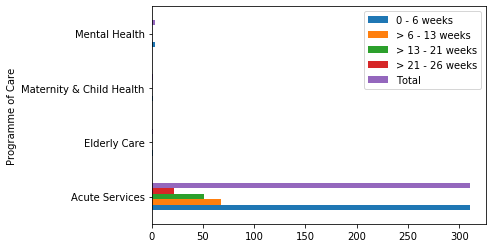

In [74]:
AdminIPWL.head()
G=AdminIPWL.groupby(['Programme of Care']).mean()
G.plot.barh()

In [76]:
TotalIPWL.head()

,Quarter Ending,HSCTrust,Specialty,Programme of Care,0 - 6 weeks,> 6 - 13 weeks,> 13 - 21 weeks,> 21 - 26 weeks,> 26 weeks,>26-52 weeks,>52 weeks,> 26-30 weeks,> 30 weeks,>30-36 weeks,> 26 - 36 weeks,> 36 weeks,Total
0,30-Jun-2007,Belfast,General Surgery,Acute Services,748,552,371,37,0,0,0,--,--,--,--,--,1708
1,30-Jun-2007,Belfast,Urology,Acute Services,661,434,224,17,0,0,0,--,--,--,--,--,1336
2,30-Jun-2007,Belfast,T & O Surgery,Acute Services,747,"1,043",677,147,0,0,0,--,--,--,--,--,2614
3,30-Jun-2007,Belfast,ENT,Acute Services,431,628,329,10,0,0,0,--,--,--,--,--,1398
4,30-Jun-2007,Belfast,Ophthalmology,Acute Services,"1,026",956,483,25,0,0,0,--,--,--,--,--,2490


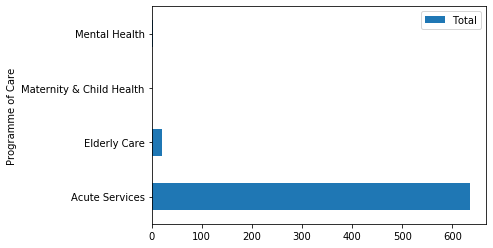

In [81]:
TotalIPWL.tail()
#F=TotalIPWL.groupby(['HSCTrust']).mean()
#F.plot.barh()
F=TotalIPWL.groupby(['Programme of Care']).mean()
F.plot.barh()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2365 entries, 0 to 2364
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   New_Hospital      2365 non-null   object 
 1   FourAndUnder_sum  2365 non-null   float64
 2   FiveToTwelve_sum  2365 non-null   float64
 3   OverTwelve_sum    2365 non-null   int64  
 4   Total_sum         2365 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 92.5+ KB


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

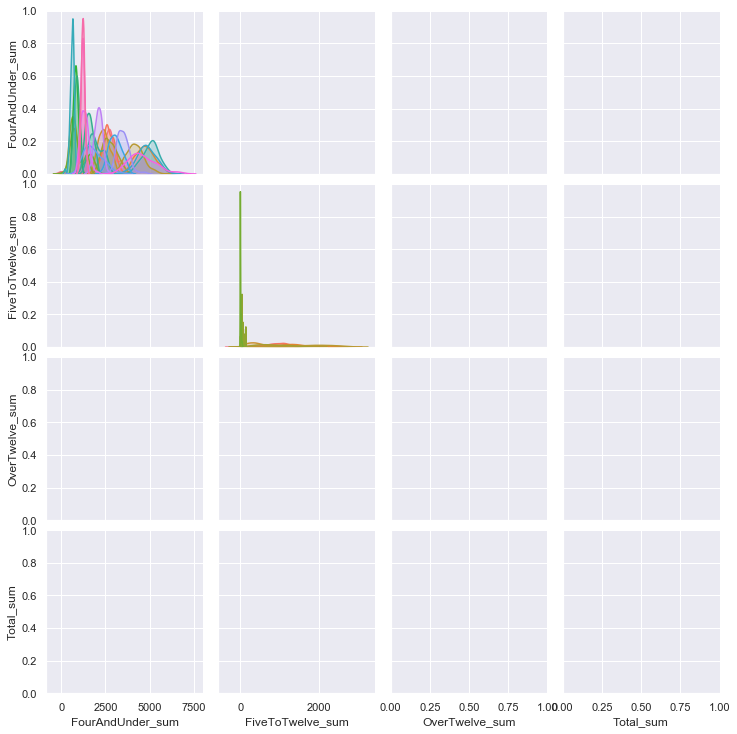

In [96]:
#([6134,6135,6136,6137,6138])
#


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
EmergWL = pd.read_csv(r"https://www.health-ni.gov.uk/sites/default/files/publications/health/hs-niwts-ecwt-tables-q1-18-19.csv");EmergWL = EmergWL.replace("Royal Victoria & Royal Victoria (ENT & RAES)","The Royal", inplace=False);EmergWL=EmergWL.fillna(0);EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(" ","");EmergWL["Total_sum"] = EmergWL["Total_sum"].str.replace(",","").astype(float);EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(" ","");EmergWL["FourAndUnder_sum"] = EmergWL["FourAndUnder_sum"].str.replace(",","").astype(float);EmergWL["FiveToTwelve_sum"] = EmergWL["FiveToTwelve_sum"].str.replace(",","").astype(float) 
EmergWL.info
df=EmergWL.drop(columns =['MthAndYrCode','Trust','Year','Type'], inplace = False) 
df.info()
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
sns.pairplot(df, hue='New_Hospital')
#DiagnosticWT=DiagnosticWT.drop_duplicates();DiagnosticWT.replace(".", 0, inplace=True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT.drop(DiagnosticWT.columns[DiagnosticWT.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True);DiagnosticWT=DiagnosticWT.fillna(0);DiagnosticWT=DiagnosticWT.drop([8579,8623,8624,8625,8626]);DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float)

#DiagnosticWT.iloc[:, 5] = DiagnosticWT.iloc[:, 5].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 6] = DiagnosticWT.iloc[:, 6].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 7] = DiagnosticWT.iloc[:, 7].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 8] = DiagnosticWT.iloc[:, 8].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 10] = DiagnosticWT.iloc[:, 10].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 11] = DiagnosticWT.iloc[:, 11].str.replace(",","").astype(float); DiagnosticWT.iloc[:, 12] = DiagnosticWT.iloc[:, 12].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 13] = DiagnosticWT.iloc[:, 13].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 14] = DiagnosticWT.iloc[:, 14].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 15] = DiagnosticWT.iloc[:, 15].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 16] = DiagnosticWT.iloc[:, 16].str.replace(",","").astype(float);DiagnosticWT.iloc[:, 17] = DiagnosticWT.iloc[:, 17].str.replace(",","").astype(float);DiagnosticWT.fillna(0);

#DiagnosticWT=DiagnosticWT.fillna(0);
#sns.set()
#%matplotlib inline
#DiagnosticWT.head()
#df=DiagnosticWT.apply (pd.to_numeric, errors='coerce')
#DWT=df.dropna()
#DiagnosticWT.describe()

#DWTbyRWT=DiagnosticWT.groupby("Recommended Waiting Time")
#DWTbyRWT.describe()


